In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\cast_desanidado.csv'
cast_df = pd.read_csv(file_path)

# Vista inicial del dataset
print("Primeras filas del dataset:")
print(cast_df.head())

# Resumen de datos faltantes
print("\nDatos faltantes por columna:")
print(cast_df.isnull().sum())

# Verificar duplicados en nombres de actores
duplicated_names = cast_df[cast_df.duplicated(subset=['name'], keep=False)]
print(f"\nNombres de actores duplicados encontrados: {len(duplicated_names)}")
print(duplicated_names[['name', 'movie_id']].head())



Primeras filas del dataset:
   movie_id  cast_id                character                 credit_id  \
0       862       14            Woody (voice)  52fe4284c3a36847f8024f95   
1       862       15   Buzz Lightyear (voice)  52fe4284c3a36847f8024f99   
2       862       16  Mr. Potato Head (voice)  52fe4284c3a36847f8024f9d   
3       862       17       Slinky Dog (voice)  52fe4284c3a36847f8024fa1   
4       862       18              Rex (voice)  52fe4284c3a36847f8024fa5   

   gender     id           name  order  
0       2     31      Tom Hanks      0  
1       2  12898      Tim Allen      1  
2       2   7167    Don Rickles      2  
3       2  12899     Jim Varney      3  
4       2  12900  Wallace Shawn      4  

Datos faltantes por columna:
movie_id         0
cast_id          0
character    25784
credit_id        0
gender           0
id               0
name             0
order            0
dtype: int64

Nombres de actores duplicados encontrados: 433015
            name  movie_id
0 

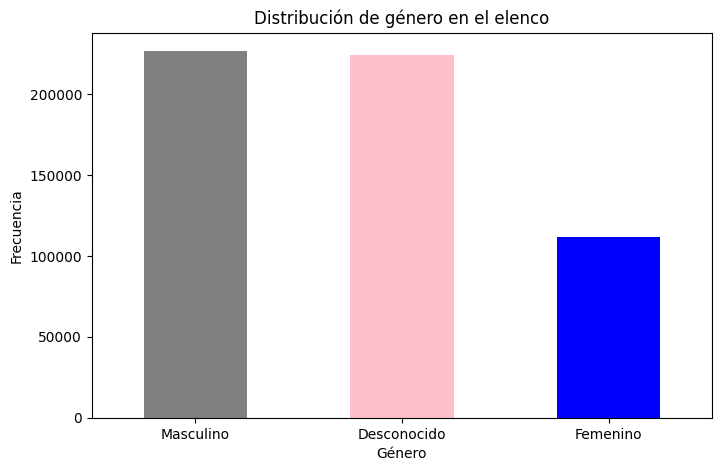

In [2]:
# Frecuencia de actores por género
gender_mapping = {0: 'Desconocido', 1: 'Femenino', 2: 'Masculino'}
cast_df['gender_label'] = cast_df['gender'].map(gender_mapping)

gender_counts = cast_df['gender_label'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['grey', 'pink', 'blue'])
plt.title('Distribución de género en el elenco')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()



Información del actor: Tom Hanks
             name  movie_id                     character  order gender_label
0       Tom Hanks       862                 Woody (voice)      0    Masculino
2393    Tom Hanks       568                    Jim Lovell      0    Masculino
5859    Tom Hanks        13                  Forrest Gump      0    Masculino
8489    Tom Hanks      9800                Andrew Beckett      0    Masculino
9083    Tom Hanks       858                   Sam Baldwin      0    Masculino
...           ...       ...                           ...    ...          ...
504992  Tom Hanks    363676  Chesley 'Sully' Sullenberger      0    Masculino
520042  Tom Hanks    207932                Robert Langdon      0    Masculino
538742  Tom Hanks    140465                Reader (voice)      7    Masculino
541857  Tom Hanks    305642                  Mr. Macauley      5    Masculino
542087  Tom Hanks    331214               British officer     37    Masculino

[72 rows x 5 columns]


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8448\190717280.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=actor_data, x='order', palette='viridis')


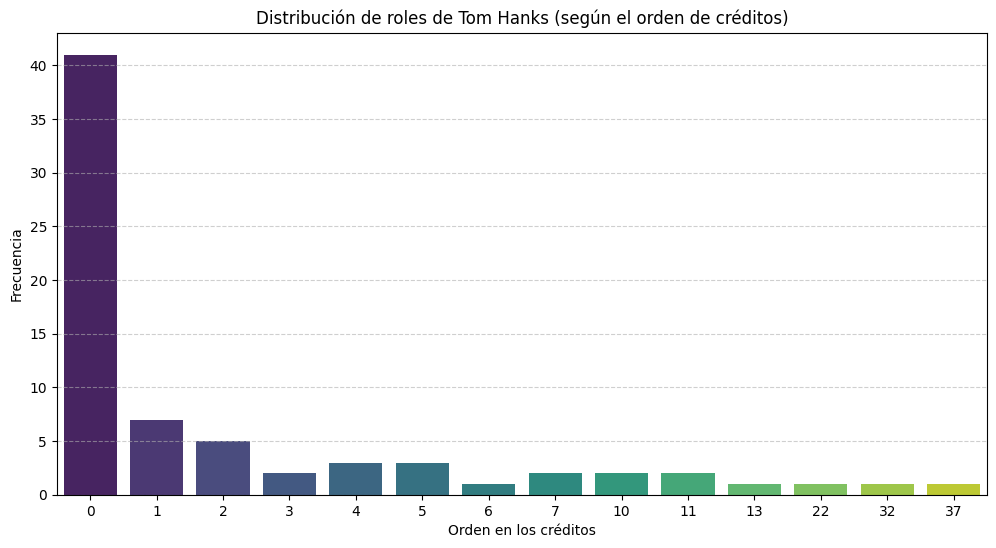

Películas en las que ha participado Tom Hanks:
        movie_id                     character
0            862                 Woody (voice)
2393         568                    Jim Lovell
5859          13                  Forrest Gump
8489        9800                Andrew Beckett
9083         858                   Sam Baldwin
...          ...                           ...
504992    363676  Chesley 'Sully' Sullenberger
520042    207932                Robert Langdon
538742    140465                Reader (voice)
541857    305642                  Mr. Macauley
542087    331214               British officer

[72 rows x 2 columns]


In [3]:
# Función para analizar un actor específico
def get_actor(nombre_actor):
    actor_data = cast_df[cast_df['name'].str.lower() == nombre_actor.lower()]
    if actor_data.empty:
        print(f"No se encontraron registros para el actor: {nombre_actor}")
        return None
    else:
        print(f"Información del actor: {nombre_actor}")
        print(actor_data[['name', 'movie_id', 'character', 'order', 'gender_label']])
        
        # Análisis gráfico
        plt.figure(figsize=(12, 6))
        sns.countplot(data=actor_data, x='order', palette='viridis')
        plt.title(f'Distribución de roles de {nombre_actor} (según el orden de créditos)')
        plt.xlabel('Orden en los créditos')
        plt.ylabel('Frecuencia')
        plt.grid(True, axis='y', linestyle='--', alpha=0.6)
        plt.show()
        
        return actor_data

# Prueba de la función
nombre_test = "Tom Hanks"  # Cambia por cualquier actor válido en el dataset
resultado = get_actor(nombre_test)

# Si se encuentran datos, realizar análisis adicional
if resultado is not None:
    print(f"Películas en las que ha participado {nombre_test}:")
    print(resultado[['movie_id', 'character']])


Tipos de datos:
movie_id      int64
cast_id       int64
character    object
credit_id    object
gender        int64
id            int64
name         object
order         int64
dtype: object

Valores únicos por columna:
movie_id      43018
cast_id         574
character    319326
credit_id    562044
gender            3
id           206158
name         202747
order           313
dtype: int64

Resumen estadístico:
            movie_id        cast_id         gender            id  \
count  562505.000000  562505.000000  562505.000000  5.625050e+05   
mean    93658.536267      51.568914       1.004852  4.497522e+05   
std    108907.506148     173.013363       0.895113  6.006140e+05   
min         2.000000       0.000000       0.000000  1.000000e+00   
25%     16914.000000       6.000000       0.000000  2.758400e+04   
50%     45007.000000      13.000000       1.000000  9.704600e+04   
75%    124054.000000      27.000000       2.000000  1.040850e+06   
max    469172.000000    1119.000000       

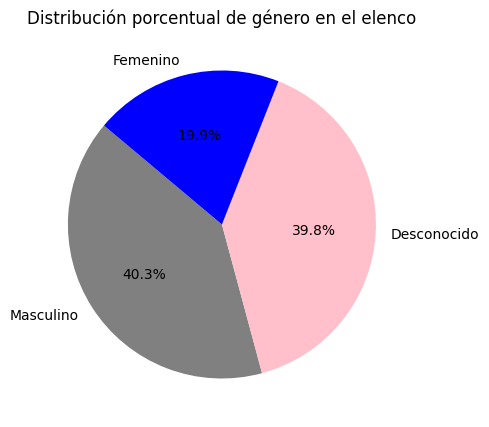

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8448\203849401.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cast_df, x='gender_label', y='order', palette='viridis')


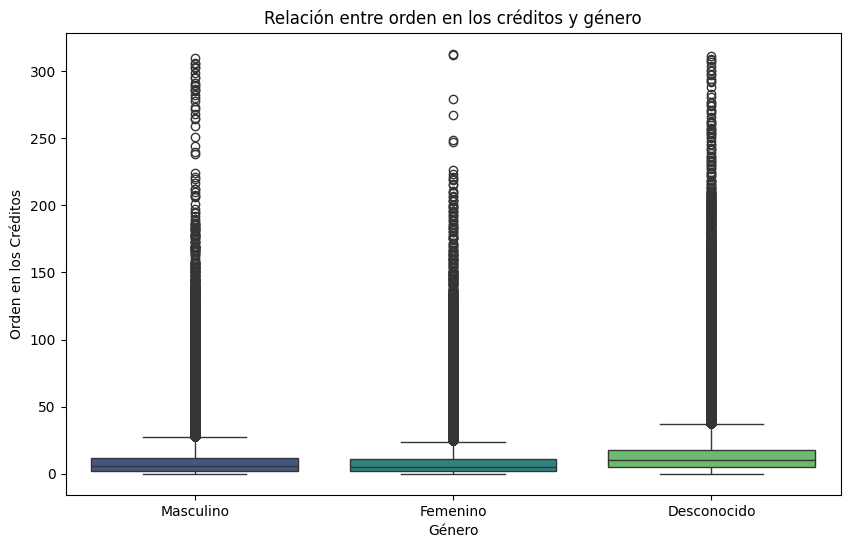

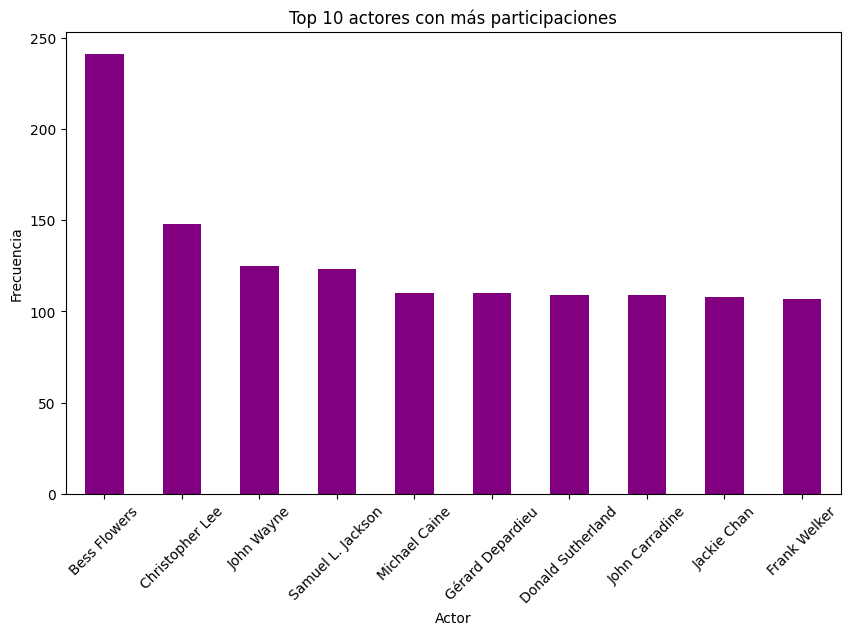

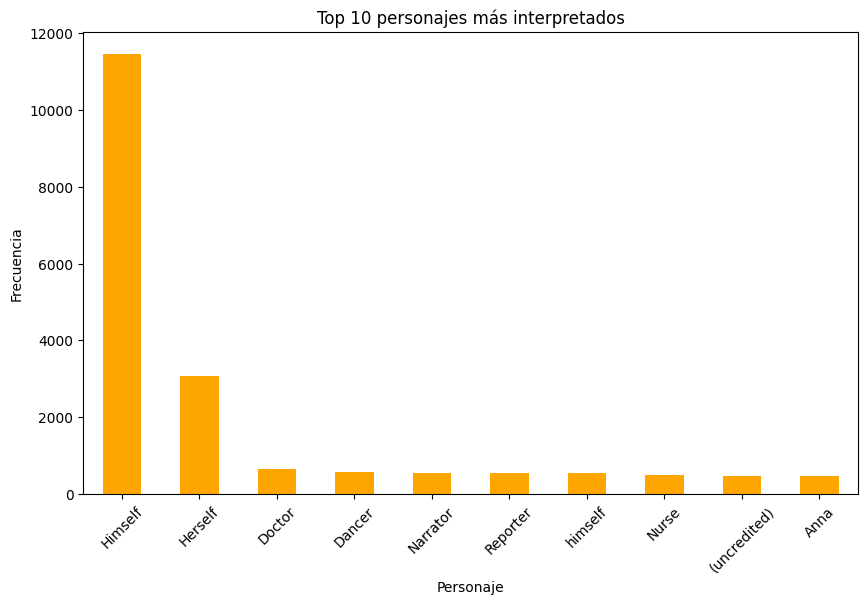

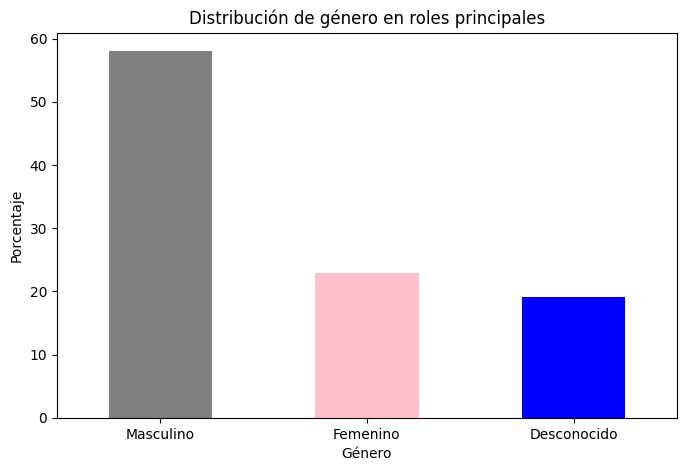

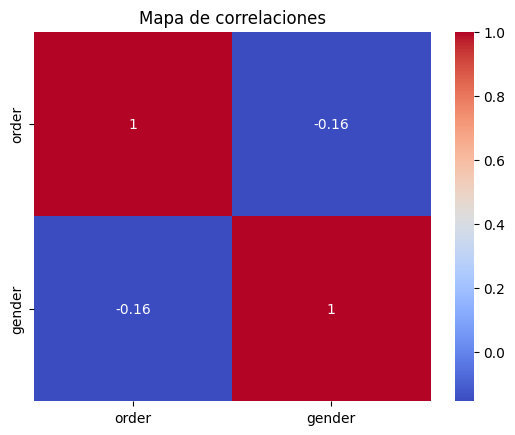

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path = r'C:\Users\USUARIO\Desktop\SOYhENRY\sistema de recomendacion\Movies\CSV\cast_desanidado.csv'
cast_df = pd.read_csv(file_path)

# Verificar tipos de datos y valores únicos
print("Tipos de datos:")
print(cast_df.dtypes)
print("\nValores únicos por columna:")
print(cast_df.nunique())

# Resumen estadístico de columnas numéricas
print("\nResumen estadístico:")
print(cast_df.describe())

# Distribución de género
gender_mapping = {0: 'Desconocido', 1: 'Femenino', 2: 'Masculino'}
cast_df['gender_label'] = cast_df['gender'].map(gender_mapping)

gender_percentage = cast_df['gender_label'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
gender_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['grey', 'pink', 'blue'], startangle=140)
plt.title('Distribución porcentual de género en el elenco')
plt.ylabel('')
plt.show()

# Relación entre el orden en los créditos y género
plt.figure(figsize=(10, 6))
sns.boxplot(data=cast_df, x='gender_label', y='order', palette='viridis')
plt.title('Relación entre orden en los créditos y género')
plt.xlabel('Género')
plt.ylabel('Orden en los Créditos')
plt.show()

# Top 10 actores más frecuentes
top_actors = cast_df['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='purple')
plt.title('Top 10 actores con más participaciones')
plt.xlabel('Actor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Personajes más interpretados
top_characters = cast_df['character'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_characters.plot(kind='bar', color='orange')
plt.title('Top 10 personajes más interpretados')
plt.xlabel('Personaje')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Número de películas por actor a lo largo del tiempo
# (Asumiendo que la información temporal está disponible en otro dataset relacionado)

# Evolución del porcentaje de género en roles principales
roles_principales = cast_df[cast_df['order'] == 0]
roles_principales_gender = roles_principales['gender_label'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
roles_principales_gender.plot(kind='bar', color=['grey', 'pink', 'blue'])
plt.title('Distribución de género en roles principales')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.show()

# Correlaciones entre variables numéricas
correlation_matrix = cast_df[['order', 'gender']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones')
plt.show()
